
# PREDICTION CAR PURCHASING DOLLAR AMOUNT USING ANNs


The dataset contains the following features:
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# LIBRARIES IMPORT


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [129]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [130]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# VISUALIZE DATASET

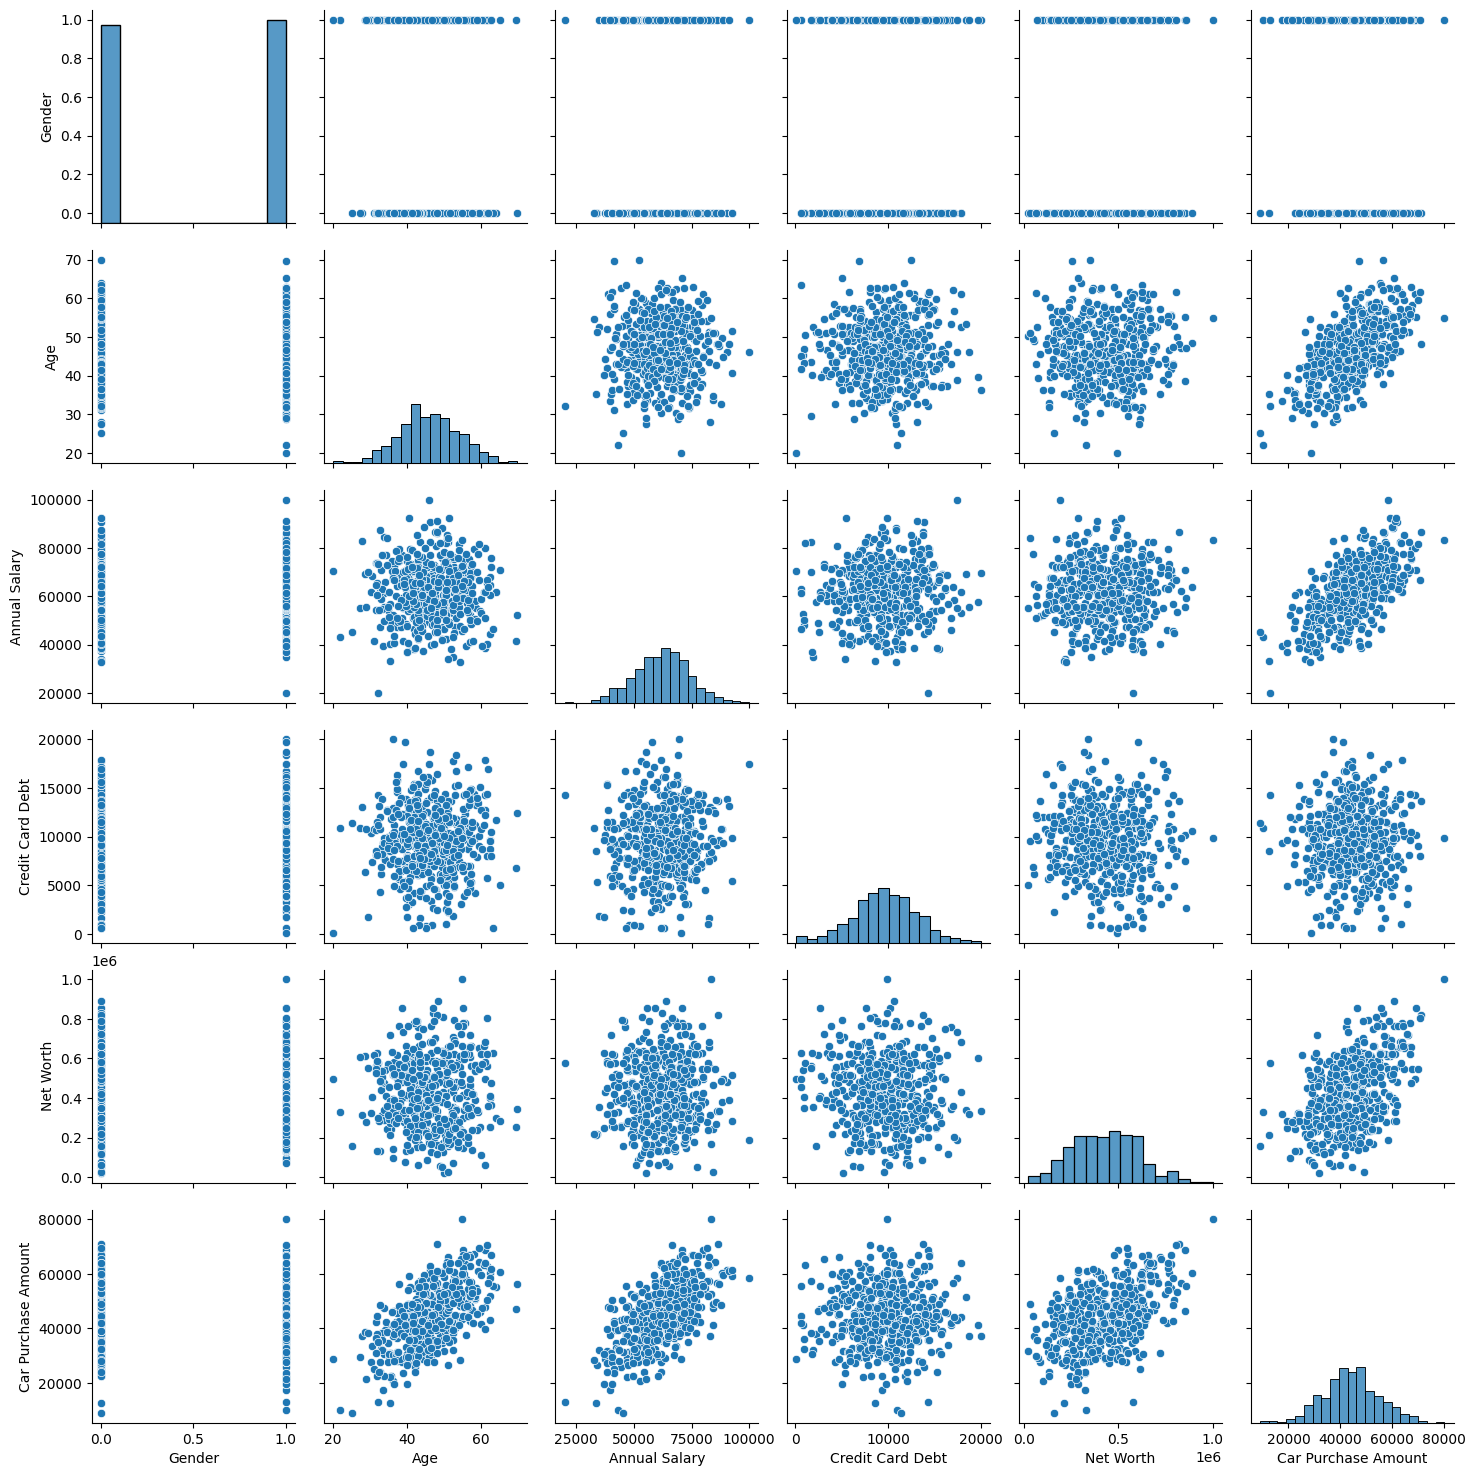

In [131]:
sns.pairplot(car_df)

In [132]:
# Initial Data Overview
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [133]:
car_df.shape

(500, 9)

In [134]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [135]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [136]:
# Missing Data Analysis
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

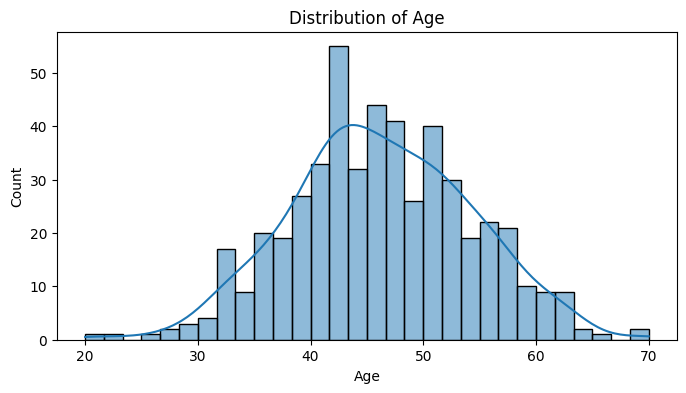

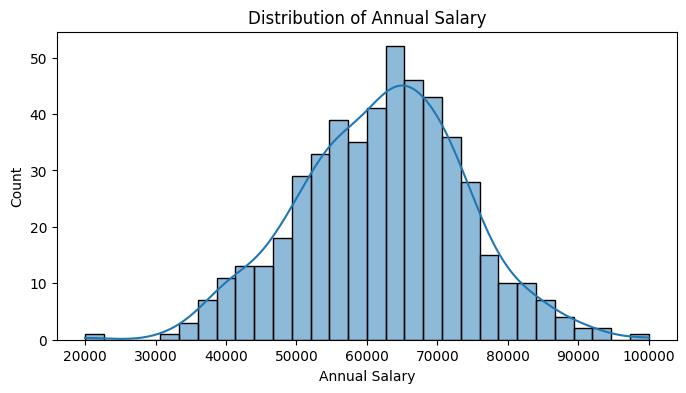

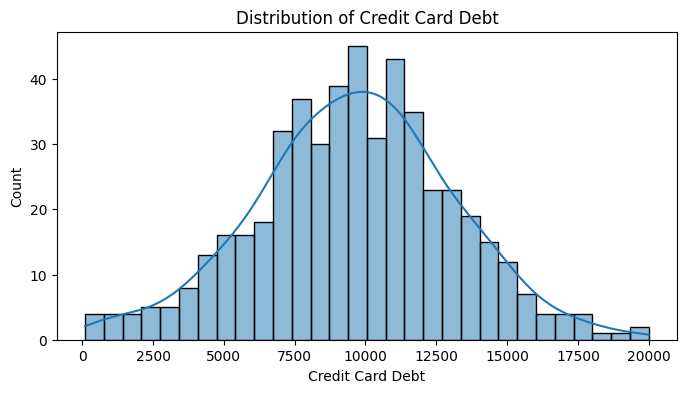

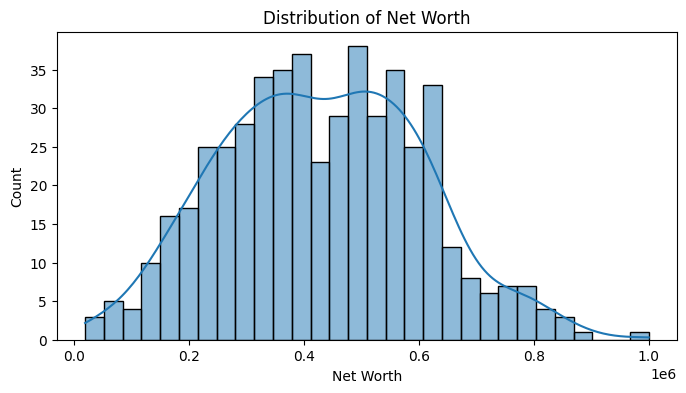

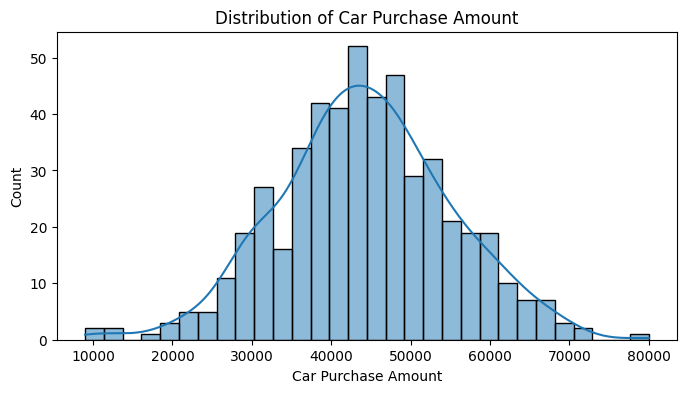

In [137]:
# Data Distribution
numerical_features = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(car_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

Text(0.5, 1.0, 'Gender Distribution')

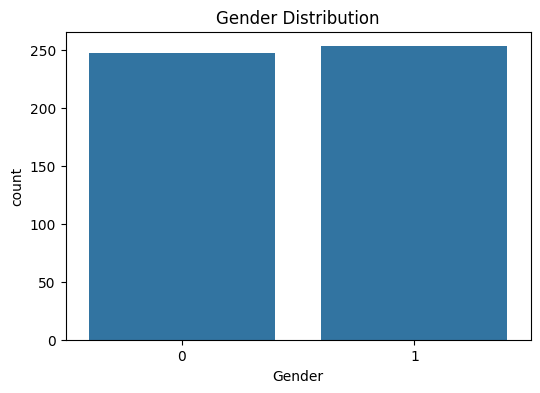

In [138]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=car_df)
plt.title('Gender Distribution')


In [ ]:
# Outlier Detection - Boxplots
for feature in numerical_features[:-1]:  # Exclude the target 'Car Purchase Amount'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=car_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
# 7. Pairplot for Numerical Features
sns.pairplot(car_df[numerical_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [ ]:
X

In [ ]:
y = car_df['Car Purchase Amount']
y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
scaler.data_max_

In [ ]:
scaler.data_min_

In [ ]:
print(X_scaled[:,0])

In [ ]:
y.shape

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y.shape

In [ ]:
y_scaled = scaler.fit_transform(y)


In [ ]:
y_scaled

# TRAINING THE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50, batch_size=25,  verbose=1, validation_split=0.2)


# EVALUATING THE MODEL 

In [ ]:
print(epochs_hist.history.keys())


In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])


In [ ]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

In [ ]:
y_predict = model.predict(X_Testing)
y_predict.shape

In [ ]:
print('Expected Purchase Amount=', y_predict[:,0])